## import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

In [2]:
folders = ['training','training_setB']
root = '/Users/janmichaelaustria/Google Drive/Insight 2020/Sepsis Detection'

### How many unique patients do we have?

In [3]:
for f in folders:
    print(len(os.listdir(root+'/'+f)))

20336
20000


In [4]:
#if i want to merge all of them that would be
(20336 + 20000)*40
#ROWS!!!

1613440

### Examine one file?

In [5]:
example = '/Users/janmichaelaustria/Google Drive/Insight 2020/Sepsis Detection/training/p014977.psv'
example = pd.read_csv(example,sep='|')
example.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,80.0,100.0,36.50,121.00,58.0,41.00,13.5,NaN,1.0,25.0,1.0,7.40,47.0,77.0,NaN,53.0,NaN,NaN,111.0,2.1,NaN,107.0,2.4,NaN,NaN,3.7,NaN,NaN,27.9,8.8,38.1,9.9,223.0,160.0,77.27,1,0,1,-69.14,3,0
1,76.0,100.0,36.25,113.25,61.0,41.50,12.0,NaN,1.0,25.0,0.5,7.40,NaN,NaN,NaN,53.0,NaN,NaN,111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.9,8.8,NaN,9.9,NaN,NaN,77.27,1,0,1,-69.14,4,0
2,80.0,100.0,36.25,132.75,71.5,46.25,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.27,1,0,1,-69.14,5,0
3,78.0,100.0,36.10,103.50,58.0,43.00,12.0,NaN,-3.0,NaN,NaN,7.34,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.5,NaN,NaN,NaN,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.27,1,0,1,-69.14,6,0
4,74.0,100.0,36.00,128.75,69.5,44.50,12.5,NaN,-3.0,NaN,NaN,7.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.27,1,0,1,-69.14,7,0


Notes on the Sepsis Label
* the label is marked 1 if sepsis occured from that time point 6 hours after
* we have no notion if the patiend died or not
* for this project, you would want to predict right away, so i need to reassign the labels
* if sepsis was predicted, backfill 1 to the beginning
* but for now just merge all of them!

### Merge
* go through each file, add in the pID tag, and a timpoint column
* concat vertically

In [22]:
frames = []
columns = ['PatientID', 'Delta_t_hours','HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel','Sepsis_At_All']
for f in folders:
    #get the root dir
    root_dir = "/".join(('/Users/janmichaelaustria/Google Drive/Insight 2020/Sepsis Detection',f))
    #list of files
    files = os.listdir(root_dir)
    for i,file in enumerate(files):
        #creat path to file
        file_path = "/".join((root_dir,file))
        #create frame
        frame = pd.read_csv(file_path,sep="|")
        #add in pID tag
        #add new label for Sepsis at ALL
        tag = frame.iloc[-1,-1]
        frame['Sepsis_At_All'] = [tag for i in range(frame.shape[0])]
        frame['PatientID'] = [file.split('.')[0] for i in range(frame.shape[0])]
        #add in time tag
        frame['Delta_t_hours'] = [i for i in range(0,frame.shape[0])]
        #move patient id tage and time to the front
        frame = frame[columns]
        frames.append(frame)
all_frames = pd.concat(frames)

In [23]:
all_frames.shape

(1552210, 44)

In [ ]:
all_frames.to_csv('Sepsis_Compiled_Full.csv')

In [13]:
all_frames.shape

(1552210, 43)

In [14]:
all_frames.head()

,PatientID,Delta_t_hours,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,p014977,0,80.0,100.0,36.50,121.00,58.0,41.00,13.5,NaN,1.0,25.0,1.0,7.40,47.0,77.0,NaN,53.0,NaN,NaN,111.0,2.1,NaN,107.0,2.4,NaN,NaN,3.7,NaN,NaN,27.9,8.8,38.1,9.9,223.0,160.0,77.27,1,0.0,1.0,-69.14,3,0
1,p014977,1,76.0,100.0,36.25,113.25,61.0,41.50,12.0,NaN,1.0,25.0,0.5,7.40,NaN,NaN,NaN,53.0,NaN,NaN,111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.9,8.8,NaN,9.9,NaN,NaN,77.27,1,0.0,1.0,-69.14,4,0
2,p014977,2,80.0,100.0,36.25,132.75,71.5,46.25,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.27,1,0.0,1.0,-69.14,5,0
3,p014977,3,78.0,100.0,36.10,103.50,58.0,43.00,12.0,NaN,-3.0,NaN,NaN,7.34,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.5,NaN,NaN,NaN,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.27,1,0.0,1.0,-69.14,6,0
4,p014977,4,74.0,100.0,36.00,128.75,69.5,44.50,12.5,NaN,-3.0,NaN,NaN,7.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.27,1,0.0,1.0,-69.14,7,0


Grab the lest entry for each patiend ID

In [23]:
last_entries = []
for a,b in all_frames.groupby('PatientID'):
    last_entries.append(b.iloc[-1,:])

In [30]:
last_entries = pd.concat(last_entries,axis=1).T

In [34]:
last_entries.head()

,PatientID,Delta_t_hours,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
53,p000001,53,84,85,NaN,78,44,NaN,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,54,0
22,p000002,22,55,95,NaN,NaN,51,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.91,0,0,1,-98.6,23,0
47,p000003,47,78,97,NaN,138,83,53,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.82,0,1,0,-1195.71,48,0
28,p000004,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.71,0,0,1,-8.77,29,0
47,p000005,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.09,1,1,0,-0.05,49,0


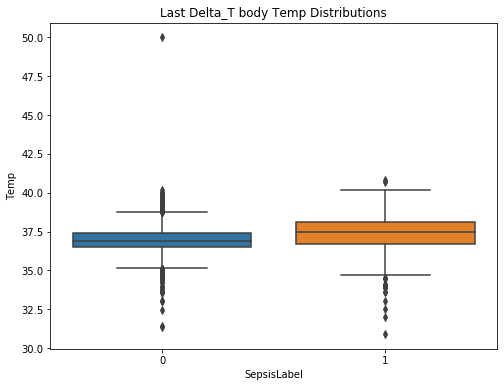

In [47]:
plt.figure(figsize=(8,6))
sns.boxplot(y='Temp',x='SepsisLabel',data=last_entries)
plt.title('Last Delta_T body Temp Distributions')
plt.show()

Count up sepsis cases and no sepsis cases

In [18]:
sepsis = 0
non_sepsis = 0
for f in folders:
    #get the root dir
    root_dir = "/".join(('/Users/janmichaelaustria/Google Drive/Insight 2020/Sepsis Detection',f))
    #list of files
    files = os.listdir(root_dir)
    for i,file in enumerate(files):
        #creat path to file
        file_path = "/".join((root_dir,file))
        #create frame
        frame = pd.read_csv(file_path,sep="|")
        if 1 in set(frame['SepsisLabel'].values):
            sepsis += 1
        else:
            non_sepsis += 1

In [19]:
sepsis,non_sepsis

(2932, 37404)

In [21]:
frame

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67,0,NaN,NaN,-11.93,1,0
1,62.0,96.5,35.9,154.0,100.0,66.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67,0,NaN,NaN,-11.93,2,0
2,63.5,97.0,NaN,136.5,94.5,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67,0,NaN,NaN,-11.93,3,0
3,65.0,96.0,NaN,182.0,113.0,72.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67,0,NaN,NaN,-11.93,4,0
4,66.0,95.0,NaN,181.0,112.0,72.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67,0,NaN,NaN,-11.93,5,0
5,72.0,97.0,36.5,193.0,126.0,81.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67,0,NaN,NaN,-11.93,6,0
6,77.5,96.0,NaN,192.0,120.5,75.5,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67,0,NaN,NaN,-11.93,7,0
7,73.0,96.0,NaN,169.0,97.0,60.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,14.0,75.0,8.7,NaN,0.62,0.2,119.0,NaN,1.9,3.0,3.9,0.6,NaN,36.2,12.2,NaN,11.6,NaN,117.0,67,0,NaN,NaN,-11.93,8,0
8,76.5,95.0,NaN,157.0,93.0,58.0,20.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67,0,NaN,NaN,-11.93,9,0
9,78.0,95.0,37.3,151.0,95.0,60.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67,0,NaN,NaN,-11.93,10,0


In [87]:
5 & 5

5

In [98]:
0 | 1 << 14

16384

In [99]:
1 << 14

16384

In [116]:
'GH'*2

'GHGH'

In [115]:
{'L':0,'R':0}

{'L': 0, 'R': 0}

In [113]:
x = 0
for i in range(100):
    print(x)
    x = 1 -x

0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


In [121]:
x = 1
for i in range(10):
    x = x^x
    print (x)

0
0
0
0
0
0
0
0
0
0


In [120]:
1^1

0

In [123]:
0^0

0

In [124]:
-4 % 4

0

In [125]:
a = (4,5)

In [126]:
a

(4, 5)

In [127]:
-1 % 4

3

In [129]:
a = input('Time in ICU? Hours?')
b = input('Current heartrate?')
c = input

What age?dsf
What time?dfls
